In [1]:
import pandas as pd
import os

In [6]:
csv_path = "/home/ali/Datasets/Harvard-GF3300/data_summary.csv"
df = pd.read_csv(csv_path)

df['age_binary'] = (df['age'] >= 60).astype(int)

bins = [-1, 24, 39, 59, 79, float('inf')]
labels = [0, 1, 2, 3, 4]
df['age_multi'] = pd.cut(df['age'], bins=bins, labels=labels, right=False).astype(int)

df['gender_binary'] = df['gender'].map({'female': 0, 'male': 1})

df['race_binary'] = df['race'].map({'asian': 0, 'white': 0, 'black': 1})

df['glaucoma'] = df['glaucoma'].map({'no': 0, 'yes': 1})

In [3]:
df[df['use'].isin(['training', 'validation'])].to_csv(os.path.join(os.path.dirname(csv_path),"train.csv"), index=False)
df[df['use']=='test'].to_csv(os.path.join(os.path.dirname(csv_path),"test.csv"), index=False)

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

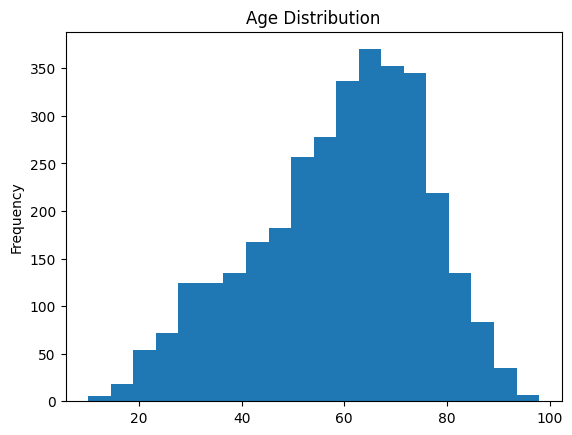

In [20]:
df['age'].plot(kind='hist', bins=20, title='Age Distribution')

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

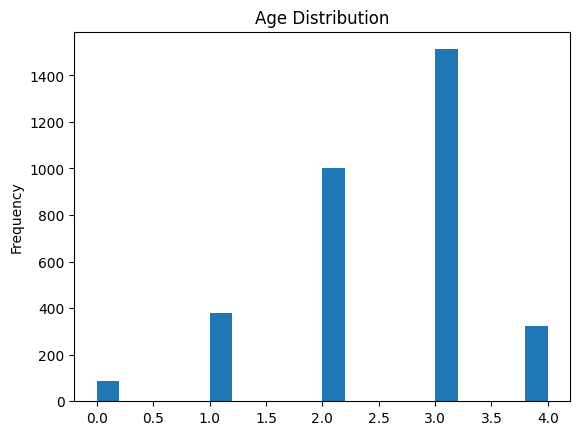

In [21]:
df['age_multi'].plot(kind='hist', bins=20, title='Age Distribution')

In [31]:
df['glaucoma'].value_counts()

glaucoma
yes    1748
no     1552
Name: count, dtype: int64

In [14]:
df['age_multi'].value_counts()

age_multi
3    1512
2    1001
1     439
4     322
0      26
Name: count, dtype: int64

In [18]:
len(df[df['age']<19])

26

<Axes: xlabel='race_binary', ylabel='count'>

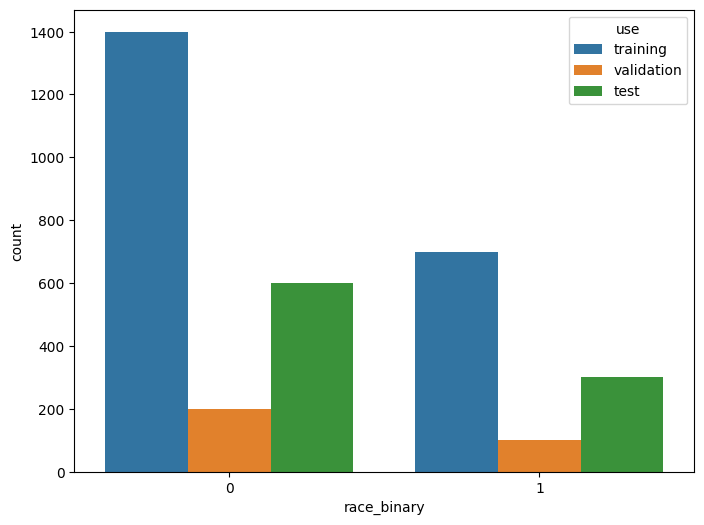

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using seaborn's countplot
sns.countplot(data=df, x='race_binary', hue='use', ax=ax)